# Tidy Tuesday: Qatar Cars
**December 9, 2025**
* What's the distribution of price? (there are some really expensive cars here!)
* What's the relationship between (logged) price and performance?
* Are there patterns across cars from different countries? Do some countries make more expensive cars? More electic cars?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
qatarcars = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-09/qatarcars.csv')

In [3]:
qatarcars

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype
0,Germany,BMW,3 Series Sedan,4.713,1.827,1.440,5,59,7.6,386,164257,1653,4.3,Sedan,Petrol
1,Germany,BMW,X1,4.505,1.845,1.642,5,505,6.6,313,264000,1701,5.4,SUV,Petrol
2,Germany,Audi,RS Q8,5.012,1.694,1.998,5,605,12.1,600,630000,2490,3.6,SUV,Petrol
3,Germany,Audi,RS3,4.542,1.851,1.412,5,321,8.7,400,310000,1565,3.8,Sedan,Petrol
4,Germany,Audi,A3,4.456,1.960,1.416,5,425,6.5,180,165000,1325,6.7,Sedan,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,South Korea,Kia,Picanto,3.595,1.595,1.495,5,255,6.0,84,58000,976,13.7,Hatchback,Petrol
101,PR China,Bestune,Oley,4.555,1.660,1.465,4,300,6.7,101,35000,1150,12.1,Hatchback,Petrol
102,Japan,Mitsubishi,Mirage,3.780,1.665,1.500,5,235,4.8,77,44000,1050,13.9,Hatchback,Petrol
103,South Korea,Hyundai,Grand i10,3.665,1.660,1.500,5,252,5.3,86,46900,1840,14.5,Hatchback,Petrol


## 1) Distribution of Price
Note that price is recorded in Qatari Riyals (QAR). The conversion rate at the time of data collection was 1 USD = 3.64 QAR.

In [4]:
qatarcars['priceUSD'] = np.round(qatarcars['price'] / 3.64).astype(int)

In [5]:
# Make sure priceUSD displays well
qatarcars.head()

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype,priceUSD
0,Germany,BMW,3 Series Sedan,4.713,1.827,1.440,5,59,7.6,386,164257,1653,4.3,Sedan,Petrol,45126
1,Germany,BMW,X1,4.505,1.845,1.642,5,505,6.6,313,264000,1701,5.4,SUV,Petrol,72527
2,Germany,Audi,RS Q8,5.012,1.694,1.998,5,605,12.1,600,630000,2490,3.6,SUV,Petrol,173077
3,Germany,Audi,RS3,4.542,1.851,1.412,5,321,8.7,400,310000,1565,3.8,Sedan,Petrol,85165
4,Germany,Audi,A3,4.456,1.960,1.416,5,425,6.5,180,165000,1325,6.7,Sedan,Petrol,45330


In [6]:
qatarcars.priceUSD.describe().apply("{0:.3f}".format)

count        105.000
mean      218838.790
std       970011.174
min         9615.000
25%        25000.000
50%        45055.000
75%        85165.000
max      9065934.000
Name: priceUSD, dtype: object

The average price of the car is \\$218,838.79.\
The median price is \\$45,055.

That is a pretty big difference. This means that there are some *really* expensive cars that are bringing the average price way up, while most cars are not as costly. A quick visual:

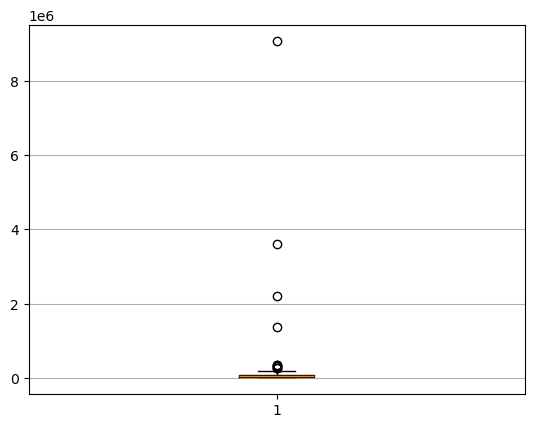

In [7]:
plt.boxplot(qatarcars.priceUSD)
plt.grid(axis='y')
plt.xlabel('')
plt.show()

At least 5 really expensive outliers are present.

In [8]:
qatarcars.priceUSD.sort_values(ascending=False).head(10)

18    9065934
17    3599989
75    2200604
76    1373626
68     357143
5      351923
69     315934
77     307692
6      277885
70     271978
Name: priceUSD, dtype: int64

Sorting the top 10 prices from most to least, ther are 4 clear outliers.

In [9]:
qatarcars.loc[[18, 17, 75, 76]]

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype,priceUSD
18,Italy,Bugatti,Centodieci,4.544,2.047,1.200,2,0,22.5,1600,33000000,1976,2.4,Coupe,Petrol,9065934
17,Italy,Bugatti,Chiron,4.544,2.037,1.212,2,45,22.3,1578,13103960,1996,2.4,Coupe,Petrol,3599989
75,UK,Lotus,Evija,4.459,2.000,1.122,2,0,NaN,1973,8010200,1887,2.9,Coupe,Electric,2200604
76,UK,McLaren,Senna,4.744,2.153,1.195,2,0,12.4,800,5000000,1198,2.8,Coupe,Petrol,1373626


Oh, so they are supercars.

Let's remove these for this specifc distribution data.

In [10]:
qatarcars_pd = qatarcars.drop(index=[18, 17, 75, 76])

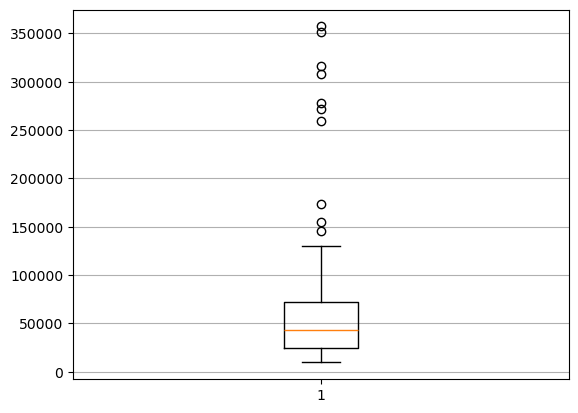

In [11]:
plt.boxplot(qatarcars_pd.priceUSD)
plt.grid(axis='y')
plt.xlabel('')
plt.show()

Even still, there are some really expensive cars. 

<Axes: xlabel='priceUSD'>

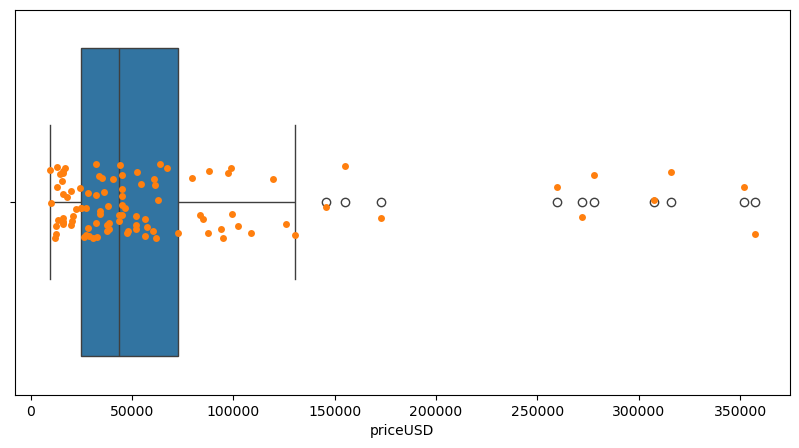

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=qatarcars_pd, x=qatarcars_pd['priceUSD'])
sns.stripplot(data=qatarcars_pd, x=qatarcars_pd['priceUSD'])

## 2) Price and Performance
Is a more expensive car better?

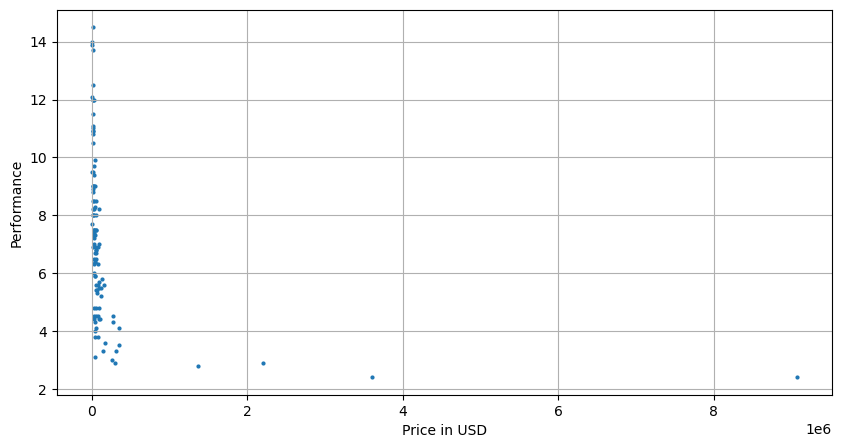

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(qatarcars['priceUSD'], qatarcars['performance'], s=4)
plt.xlabel('Price in USD')
plt.ylabel('Performance')
plt.grid()

Lower value in performance is better. Performance describes how many seconds it takes to go from 0 to 100 km per hour.

The super expensive outliers appear to distract from the rest of the data. I will re-plot excluding the outliers.

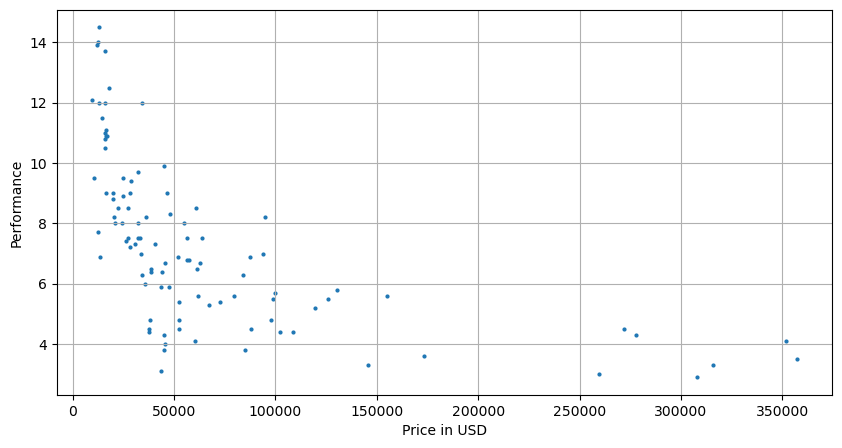

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(qatarcars_pd['priceUSD'], qatarcars_pd['performance'], s=4)
plt.xlabel('Price in USD')
plt.ylabel('Performance')
plt.grid()

In general, a more expensive car leads to better performance. The data follows a somewhat exponentially downward trend.

## 3) Patterns in countries

In [15]:
qatarcars.origin.value_counts()

origin
Japan          29
Germany        20
PR China       18
UK             11
South Korea    10
USA             9
Italy           5
Sweden          3
Name: count, dtype: int64

There are 8 countries represented in the data.

Are there countries that tend to produce more expensive cars?

In [16]:
# List of countries
origins = list(set(qatarcars.origin))

# List of countries and average prices
countries = []
average_cost = []

# loop through the countries
for country in origins:
    total = 0
    count = 0
    for row in range(len(qatarcars)):
        # Check if origin of car matches
        if qatarcars.iloc[row]['origin'] == country:
            total += qatarcars.iloc[row]['priceUSD']
            count += 1
    average = np.round(total/count, 2).astype(int) #Calculate the average

    countries.append(country)
    average_cost.append(average)

In [17]:
# Country from least to highest average price
[x for _, x in sorted(zip(average_cost, countries))]

['PR China', 'South Korea', 'Japan', 'Sweden', 'USA', 'Germany', 'UK', 'Italy']

In [18]:
# Their respective average prices
average_cost.sort()
average_cost

[np.int64(24986),
 np.int64(34659),
 np.int64(40032),
 np.int64(54487),
 np.int64(57340),
 np.int64(100254),
 np.int64(487767),
 np.int64(2594146)]

Asian countries produces the least expensive cars in the data. Europeans countries produce the most expensivem with the exception of Sweden.

What about the relationship between country and electric cars?

In [19]:
qatarcars.enginetype.value_counts()

enginetype
Petrol      81
Hybrid      14
Electric    10
Name: count, dtype: int64

Only 10 car models are fully electric. 14 are hybrid. What countries are responsible?

In [20]:
print(sqldf('''
SELECT origin, COUNT(enginetype) AS 'Electric' FROM qatarcars
WHERE enginetype  = 'Electric'
GROUP BY origin
ORDER BY COUNT(enginetype) DESC
'''))

print()

print(sqldf('''
SELECT origin, COUNT(enginetype) AS 'Hybrid' FROM qatarcars
WHERE enginetype  = 'Hybrid'
GROUP BY origin
ORDER BY COUNT(enginetype) DESC
'''))

        origin  Electric
0          USA         3
1           UK         2
2  South Korea         2
3     PR China         2
4      Germany         1

        origin  Hybrid
0        Japan       5
1           UK       4
2       Sweden       3
3  South Korea       1
4      Germany       1


Finish